In [6]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [8]:
file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([0.1,0.1,0.5])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.14777537 0.14324105 0.5343413 ] [[0.31162319 0.23267706 0.65      ]]
The system is controllable.


In [4]:
file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A,B)

[[ 9.22843754e-01  5.45201041e-02  2.97556445e-02 -5.98146141e-01
  -1.40780821e-01  5.57349361e-02 -3.10916334e-01  4.38861132e-01
   5.39931431e-02  7.14703977e-01 -3.44792679e-02]
 [-2.31359005e-02  9.33998644e-01 -1.23901283e-02 -1.87942639e-01
   4.20782000e-01 -1.51655730e-02 -2.63774484e-01  8.36929074e-04
  -1.25138694e-03 -4.22041059e-01  1.47751812e-02]
 [-4.17524353e-02 -3.38647403e-02  9.68610585e-01 -3.26554209e-01
   4.78491604e-01 -3.78534459e-02  1.19569965e-01 -3.68718833e-01
   9.86729488e-02 -1.95270196e-01  9.41945612e-02]
 [-8.24790671e-02 -9.15395934e-03 -6.66175678e-04  3.41217130e-01
   3.31844032e-01  6.31359778e-03 -6.57706382e-03  1.56086311e-01
   4.62317020e-02  9.93161649e-02 -2.41023935e-02]
 [ 4.49107140e-02  5.59455939e-02  2.07148232e-02  3.63523334e-01
   4.89320874e-01  2.28032246e-02 -8.02384596e-03  1.06867336e-01
  -9.02212225e-03  3.67254406e-01  1.27267493e-02]
 [ 4.32646088e-02  2.20322646e-02 -7.88746774e-03  3.39540452e-01
  -1.91465348e-01 -

In [10]:
Ae = np.linalg.eigvals(A)
print(abs(eee))
print(A)

[0.6671216  0.05704826 0.20257711 0.20257711 0.49422142 0.43215787
 0.37377557 0.99992865 1.0001483  1.0001483  1.0004467 ]
(11, 11)


# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [1]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 400
path=simulate_path(SimLength)

./dataset/MPC/SimLenth_400_Ts_0.1


Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]


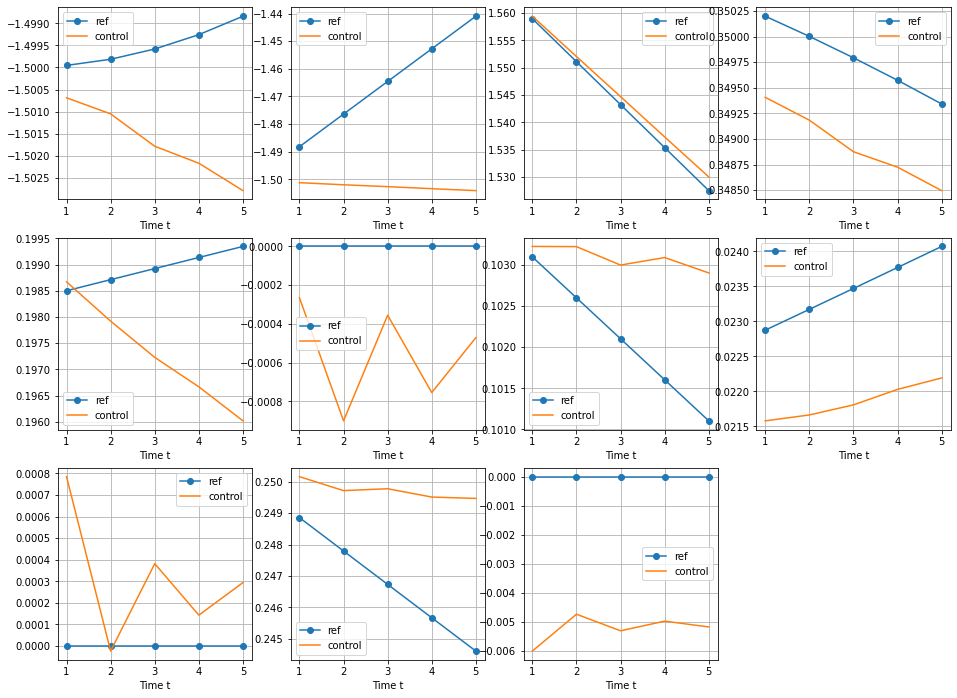

6.647993968560756e-05 [-1.50232267 -1.48640382  1.55850819] [-0.00760306 -0.08207523]
Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]


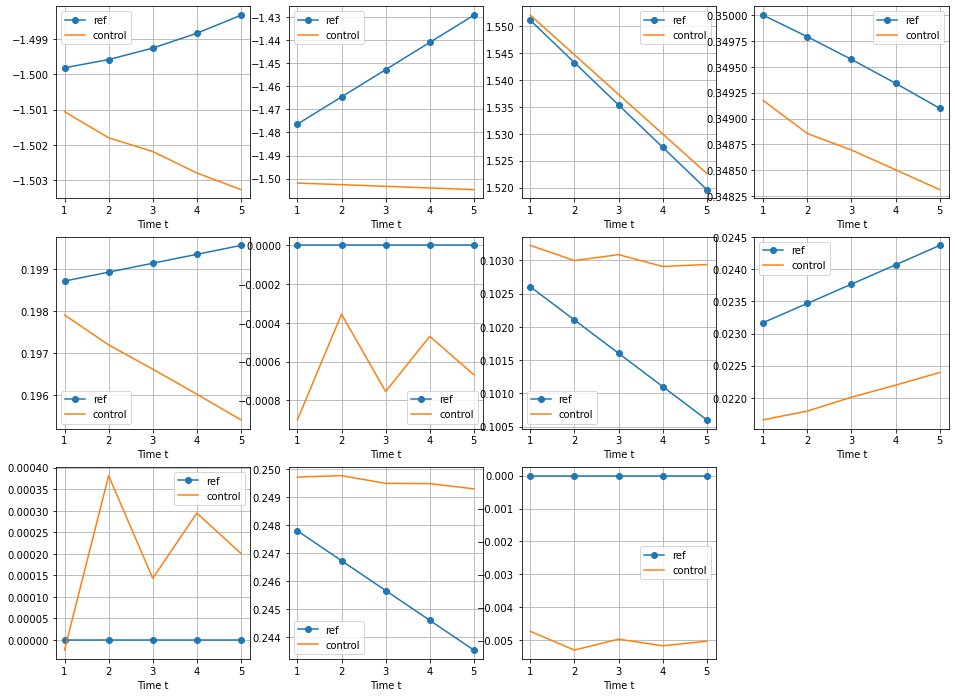

0.0001377518493894119 [-1.50421131 -1.48861217  1.55107413] [-0.01776585 -0.08838725]
Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]


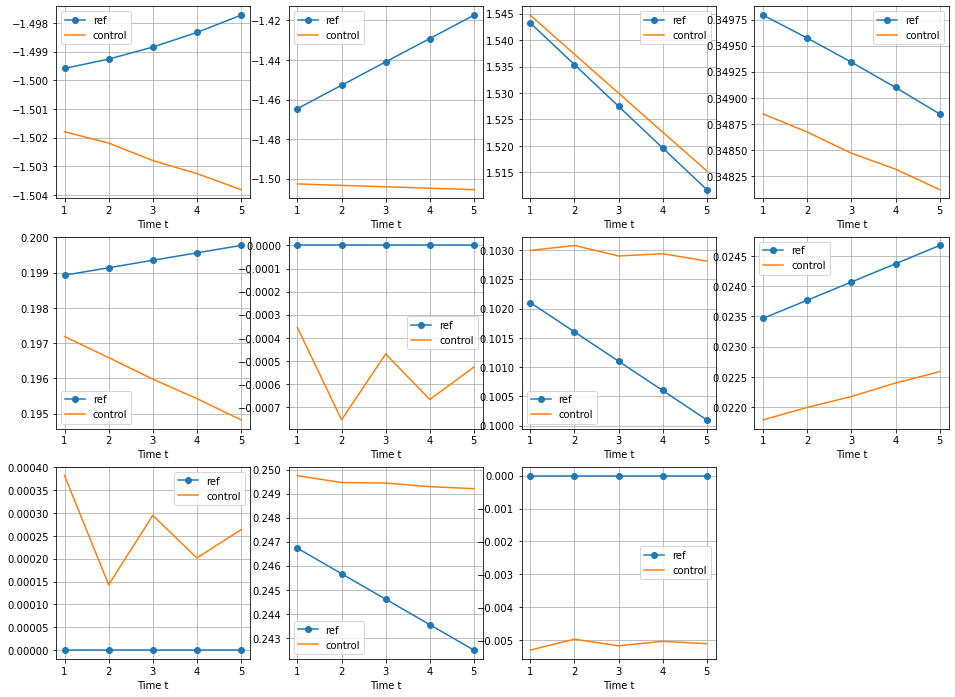

0.00023955132290001422 [-1.50288194 -1.49180129  1.54428083] [-0.01356539 -0.08916292]
Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]


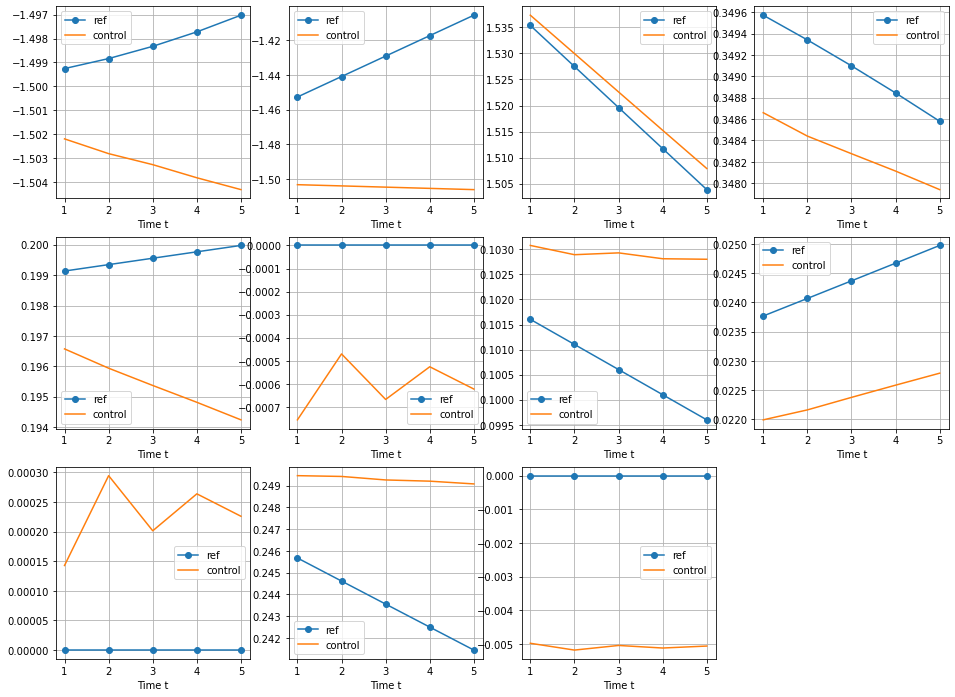

0.0003697369988205003 [-1.50364047 -1.4940262   1.5367675 ] [-0.01129162 -0.08872417]


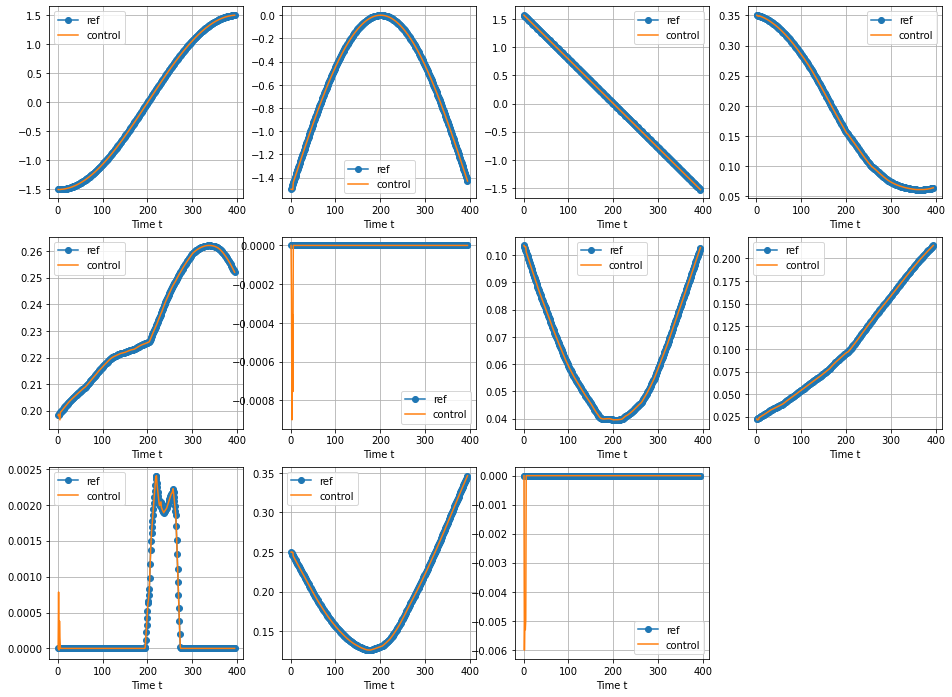

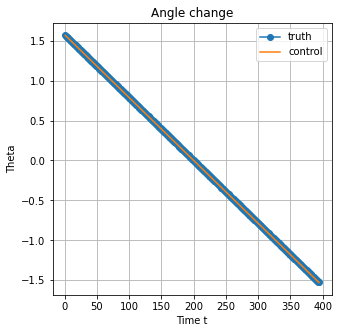

Average time needed per step is 13.849135623409673 ms.
MSE loss: 6.755796918334571e-06
Controled path file: Q-[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]_R-[0.1 0.1]_rho-0.01_Nc-5
Total time needed is 6862.9598000000005 ms.


In [3]:
# get augmented matrices
model_file = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 1000*np.diag(np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 0.1*np.diag(np.array([1.,1.]))
rho = 0.01
# Np = 6
Nc = 5
path_ref = np.load(path+"/X.npy")
u_init = np.array([1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process(model_file,path_ref,u_init,Q,R,rho,Nc)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

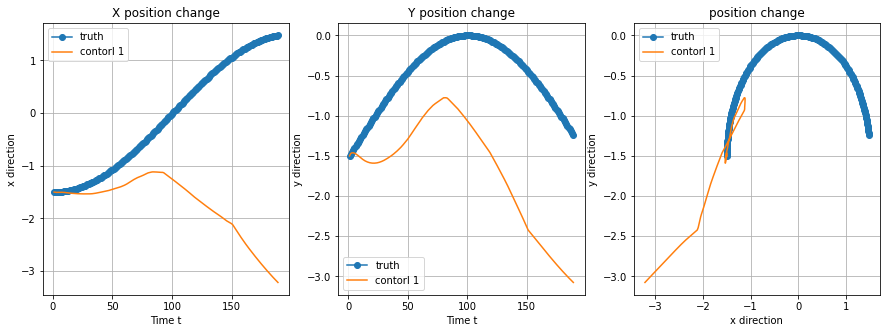

In [10]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

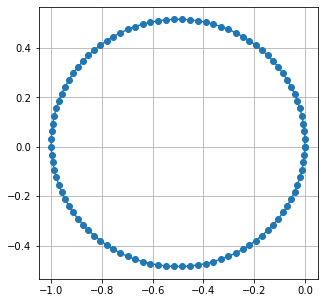

In [7]:
SimLength = 100
X = np.zeros((3,SimLength+1))
X[:,0] = np.array([0,0,np.pi/2])
u = np.array([0.5*20*np.pi/SimLength,20*np.pi/SimLength])

# start simulation as save state
for i in range(SimLength):
    X[:,i+1] = discrete_nonlinear(X[:,i],u,0.1)
plt.figure(figsize=(5,5))
plt.plot(X[0,:],X[1,:],'o-')
plt.grid(True)
plt.show()

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [14]:
H = SX(2*np.eye(2))
A = SX(np.ones((2,2)))
g = SX(np.zeros(2))
lba = SX(np.zeros(2))
uba = SX(np.zeros(2))
qp = {}
qp['h'] = H.sparsity()
qp['a'] = A.sparsity()
S = conic('S','osqp',qp)
print(S)
r = S(h=H, g=g,a=A, lba=lba)
x_opt = r['x']
print('x_opt: ', x_opt)

S:(h[2x2],g[2],a[2x2],lba[2],uba[2],lbx[2],ubx[2],x0[2],lam_x0[2],lam_a0[2],q[],p[])->(x[2],cost,lam_a[2],lam_x[2]) OsqpInterface


RuntimeError: D:\bld\casadi_1647512553768\work\casadi\core\function_internal.cpp:1832: 'eval_sx' not defined for OsqpInterface